[**Demo %s**](#demo-blackscholes-unstable)

Let's try to do everything the same as in {numref}`Demo {number} <demo-blackscholes-solve>`, but extending the simulation time to $T=8$.

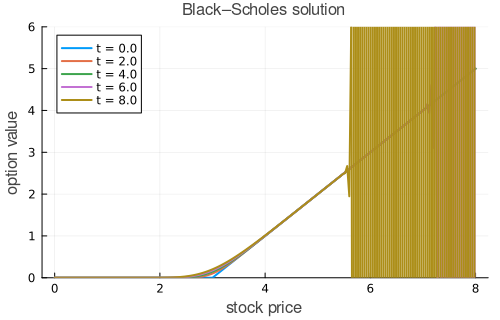

In [2]:
K, σ, r = (3, 0.06, 0.08);
Smax = 8 
T = 8

m = 200;  h = Smax / m;
x = h * (0:m)
n = 1000;  τ = T / n;
t = τ * (0:n)
λ = τ / h^2;  μ = τ / h;

V = zeros(m+1, n+1)
V[:, 1] = @. max(0, x - K)
for j in 1:n
    # Fictitious value from Neumann condition.
    Vfict = 2h + V[m,j]
    Vj = [ V[:, j]; Vfict ]
    # First row is zero by the Dirichlet condition.
    for i in 2:m+1 
        diff1 = (Vj[i+1] - Vj[i-1])
        diff2 = (Vj[i+1] - 2Vj[i] + Vj[i-1])
        V[i,j+1] = Vj[i] +
            (λ * σ^2 * x[i]^2 / 2) * diff2 
            + (r * x[i] * μ) / 2 * diff1 
            - (r * τ) * Vj[i]
    end   
end

idx = 1:250:n+1
label = reshape(["t = $t" for t in t[idx]], 1, length(idx))
plot(x, V[:, idx];
    label, legend=:topleft,
    title="Black–Scholes solution",
    xaxis=("stock price"),  yaxis=("option value",[0, 6]))

In [3]:
anim = @animate for j in 1:10:n+1 
    plot(x, V[:, j];
        xaxis=(L"S"),  yaxis=([0,6],L"v(S,t)"),
        title="Black–Scholes solution...?",
        dpi=150,  label=@sprintf("t = %.2f",t[j]))
end
mp4(anim, "black-scholes-8.mp4")

[ Info: Saved animation to /Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc-notebooks/chapter11/section1/julia/black-scholes-8.mp4


Plots.AnimatedGif("/Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc-notebooks/chapter11/section1/julia/black-scholes-8.mp4")

This so-called solution is nonsense!